# Wrangle and Analyze Data (Udacity - Data Analyst Nanodegree Program)
#### Alen Mrsic

## Project Context

<b>Goal:</b> wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Gathering data

In [187]:
# Importing python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tweepy
import requests
import json
import re

### TSV file: image-predictions.tsv

In [8]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
http_response = requests.get(url)
file_name = 'image-predictions.tsv'

with open (file_name, mode='wb') as  file:
    file.write(http_response.content) 

In [9]:
image_predict = pd.read_csv(file_name, sep='\t', encoding='UTF-8')
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### CSV file: twitter-archive-enhanced.csv

In [10]:
# Read CSV (comma-separated) file into DataFrame
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

In [12]:
# check to the file content, only first 5 rows
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Twitter file constructed via API

In [43]:
consumer_key = #consumer_key
consumer_secret = #consumer_secret
access_token = #access_token
access_secret = #access_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [60]:
exception_list = []
tweet_list = []
i = 1

for tweet_id in twitter_archive_enhanced['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        favorites_cnt = tweet['favorite_count'] 
        retweets_cnt = tweet['retweet_count']  
        tweet_list.append({'tweet_id': int(tweet_id),
                'favorites': int(favorites_cnt),
                'retweets': int(retweets_cnt)})
        
        if i%100==0:
            print("Number of processed tweets: " + str(i))
        i += 1

    except Exception as e:
        exception_list.append(tweet_id)

Number of processed tweets: 100
Number of processed tweets: 200
Number of processed tweets: 300
Number of processed tweets: 400
Number of processed tweets: 500
Number of processed tweets: 600


Rate limit reached. Sleeping for: 207


Number of processed tweets: 700
Number of processed tweets: 800
Number of processed tweets: 900
Number of processed tweets: 1000
Number of processed tweets: 1100
Number of processed tweets: 1200
Number of processed tweets: 1300
Number of processed tweets: 1400
Number of processed tweets: 1500


Rate limit reached. Sleeping for: 604


Number of processed tweets: 1600
Number of processed tweets: 1700
Number of processed tweets: 1800
Number of processed tweets: 1900
Number of processed tweets: 2000
Number of processed tweets: 2100
Number of processed tweets: 2200
Number of processed tweets: 2300


In [240]:
print ("Total number of archived tweets id: " + str(len(twitter_archive_enhanced))
       ,", number of scraped tweets from api: " + str(len(tweet_list))
       ,", number of recived errors from api: "+str(len(exception_list)))

Total number of archived tweets id: 2356 , number of scraped tweets from api: 2345 , number of recived errors from api: 11


In [241]:
# Corresponds with HTTP 404. The requested Tweet ID is not found (if it existed, it was probably deleted)
for missingtweet_id in exception_list:
    try:
        tweet = api.get_status(missingtweet_id, tweet_mode='extended')
    except tweepy.TweepError as e:
        print ("Error message: " + str(e.args[0][0]['message']) + ", with error code: "  +str(e.args[0][0]['code']) )

Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144
Error message: No status found with that ID., with error code: 144


In [228]:
#create file tweet_json.txt with columns 'tweet_id', 'favorites', 'retweets'
tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorites', 'retweets'])
tweet_json.to_csv('tweet_json.txt', index=False, encoding = 'utf-8')

In [229]:
tweet_json.head()

,tweet_id,favorites,retweets
0,892420643555336193,38871,8612
1,892177421306343426,33287,6327
2,891815181378084864,25087,4200
3,891689557279858688,42238,8726
4,891327558926688256,40395,9497


### Gathering summary

I gathered the data:

- from HTTP server saved to my local drive as tsv file - image-predictions.tsv
    - saved to image_predict dataframe
- from my local drive - twitter-archive-enhanced.csv.
    - saved to twitter_archive_enhanced dataframe 
- from the Twitter API saved to my local drive as txt file - tweet_json.txt
    - saved to tweet_json dataframe

From the Twitter API, I received an error "No status found with that ID" with an error code "144" for 11 tweets. From https://developer.twitter.com/en/docs/basics/response-codes I found out that the requested Tweet ID is not found (if it existed, it was probably deleted).

## Assessing the data

#### image_predict dataframe

In [263]:
image_predict.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [247]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [261]:
image_predict['jpg_url'].value_counts().head(10)

https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg    2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                2
Name: jpg_url, dtype: int64

In [258]:
image_predict[image_predict['jpg_url'] == 'https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
930,703041949650034688,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
1463,778396591732486144,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False


#### twitter_archive_enhanced dataframe 

In [5]:
twitter_archive_enhanced.head(50) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [274]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [281]:
twitter_archive_enhanced['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
Daisy             7
Bailey            7
an                7
Toby              7
Buddy             7
Leo               6
Rusty             6
Dave              6
Jax               6
Oscar             6
Stanley           6
Jack              6
Scout             6
Milo              6
Koda              6
Bella             6
Finn              5
               ... 
Eleanor           1
Mimosa            1
Wiggles           1
Traviss           1
Sojourner         1
Bruno             1
Obie              1
Tonks             1
Cleopatricia      1
Brandi            1
Rodman            1
light             1
Harlso            1
Goose             1
Dido              1
Trevith           1
Donny             1
Ricky             1
Tassy             1


In [812]:
twitter_archive_enhanced['text'].str[:10].unique()

array(['This is Ph', 'This is Ti', 'This is Ar', 'This is Da',
       'This is Fr', 'Here we ha', 'Meet Jax. ', 'When you w',
       'This is Zo', 'This is Ca', 'This is Ko', 'This is Br',
       "Here's a p", 'This is Te', 'This is St', 'This is Ol',
       'This is Ji', 'This is Ze', 'This is Ra', 'RT @dog_ra',
       'This is Ge', 'This is Je', "I've yet t", 'You may no',
       'This... is', 'This is Ma', 'This is Mi', 'This is De',
       'This is Ro', '@NonWhiteH', 'This is Wa', 'RT @Athlet',
       'Viewer dis', 'I have a n', 'This is Ea', 'This is Lo',
       'This is Ke', 'I present ', 'OMG HE DID', 'Meet Yogi.',
       'This is No', 'This is Be', 'Meet Grizz', 'Please onl',
       'This is Ru', 'This is Gu', 'This is Al', 'This is Re',
       'This is Ga', '@roushfenw', 'Here is a ', 'Meet Ellio',
       'Ugh not ag', 'Meet Jesse', 'Please don', '@RealKentM',
       'This is Ba', 'This is Du', 'This is Ja', 'This is Sn',
       'Martha is ', 'Meet Shado', 'This is Em', 'This 

In [7]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id     2345 non-null int64
favorites    2345 non-null int64
retweets     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


### Tidiness
- create one variable from four columns: doggo, floofer, pupper, puppo
- create one data set, join image_predict and tweet_json with twitter_archive_enhanced

### Quality

- there are retweets in the dataset, remove the data and columns
- different number of entries in image_predict (2075) from twitter archive (2356), so that means that some tweets have no image
- display full content of text column
- remove HTML part from source column to be easier to read
- correct the dog names, find out a name from tweet text (some cases like 'a', 'an')
- rename columns to have a more meaningful name (to be easier understand what that column represent)
- change the data type for columns which have a wrong data type.
- from tweet text remover URL 


## Cleaning the data

In [834]:
# Before we start with cleaning process I'll first create clean copy for each dataframe
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predict_clean = image_predict.copy()
tweet_json_clean = tweet_json.copy()

### Tidiness

#### Define

Create one variable from four variables: doggo, floofer, pupper, puppo

#### Code

In [835]:
concat_dogs = twitter_archive_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)
twitter_archive_enhanced_clean['dog'] = concat_dogs

In [836]:
vars_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(vars_to_drop, axis=1)

#### Test

In [837]:
dog_not_na = pd.notna(twitter_archive_enhanced_clean['dog'])
twitter_archive_enhanced_clean[dog_not_na].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog
1142,727524757080539137,NaN,NaN,2016-05-03 15:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper had to undergo emergency haircut surgery so he could hear again. 10/10 miraculous af https://t.co/fUyDIFkBwx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/727524757080539137/photo/1,https://twitter.com/dog_rates/status/727524757080539137/photo/1",10,10,None,pupper
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281705472000/photo/1,10,10,the,pupper
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773788876800/photo/1,10,10,his,doggo
1608,685641971164143616,NaN,NaN,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10 https://t.co/jJS8qQeuNO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685641971164143616/photo/1,7,10,Otis,pupper


<hr>

#### Define

Create one data set, join image_predict and tweet_json with twitter_archive_enhanced

#### Code


In [838]:
we_rate_dogs_clean = pd.merge(twitter_archive_enhanced_clean, image_predict_clean,how='left',on=['tweet_id'])
we_rate_dogs_clean = pd.merge(we_rate_dogs_clean, tweet_json_clean, how='left',on=['tweet_id'])

#### Test

In [839]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog                           399 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       20

### Quality

#### Define
There are retweets in dataset, remove the data and columns

#### Code

In [840]:
#remove the data
we_rate_dogs_clean = we_rate_dogs_clean[we_rate_dogs_clean['retweeted_status_id'].isnull()]

#### Test

In [841]:
sum(we_rate_dogs_clean['retweeted_status_id'].notnull())

0

#### Code

In [842]:
#remove columns
columns_to_remove = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
we_rate_dogs_clean = we_rate_dogs_clean.drop(columns_to_remove, axis=1)

#### Test

In [843]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog                      364 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                    

---

#### Define
Different number of entries in image_predict (2075) from twitter archive (2356), so that means that some tweets have no image
Remove those records from dataframe.

#### Code

In [844]:
we_rate_dogs_clean = we_rate_dogs_clean.dropna(subset = ['jpg_url'])

#### Test

In [845]:
len(we_rate_dogs_clean)

1994

<hr>

#### Define
Display full content of text column.

#### Code

In [846]:
pd.set_option('display.max_colwidth',999)
pd.options.display.max_colwidth

999

#### Test

In [847]:
we_rate_dogs_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
1485,693155686491000832,NaN,NaN,2016-01-29 19:36:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dunkin. He can only see when he's wet (tragic). 12/10 future heartbreaker https://t.co/At8Kxc5H9U,"https://twitter.com/dog_rates/status/693155686491000832/photo/1,https://twitter.com/dog_rates/status/693155686491000832/photo/1,https://twitter.com/dog_rates/status/693155686491000832/photo/1,https://twitter.com/dog_rates/status/693155686491000832/photo/1",12,10,Dunkin,...,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True,8480.0,3521.0
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4,10,Benedict,...,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False,3491.0,1092.0
1878,675047298674663426,NaN,NaN,2015-12-10 20:19:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI,https://twitter.com/dog_rates/status/675047298674663426/photo/1,11,10,a,...,0.978007,True,chow,0.007121,True,Pomeranian,0.006398,True,1113.0,354.0
623,796031486298386433,NaN,NaN,2016-11-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Daisy. She's here to make your day better. 13/10 mission h*ckin successful https://t.co/PbgvuD0qIL,https://twitter.com/dog_rates/status/796031486298386433/photo/1,13,10,Daisy,...,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False,11842.0,4181.0
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,...,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True,3534.0,798.0


<hr>

#### Define
Remove HTML part from source column to be easier to read

#### Code

In [848]:
we_rate_dogs_clean['source'] = we_rate_dogs_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
we_rate_dogs_clean['source'] = we_rate_dogs_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
we_rate_dogs_clean['source'] = we_rate_dogs_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [849]:
we_rate_dogs_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

<hr>

#### Define
Correct the dog names, find out a name from tweet text (some cases like 'a', 'an'). I found out that sample that's repeating for dog names : 'This is', 'Meet', 'Say hello to','Here we have ').



#### Code

In [850]:
names = []
req_ex = r'[A-Z].*'

for text in we_rate_dogs_clean['text']:
    if text.startswith('This is ') and re.match(req_ex,text.split()[2]): #Names which starts with 'This is [name]...'
        names.append(text.split()[2].strip(',').strip('.')) #Remove '.' and ',' from string
    elif text.startswith('Meet ') and re.match(req_ex,text.split()[1]):
        names.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(req_ex,text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(req_ex,text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.')) 
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        names.append('None')
        
we_rate_dogs_clean['name'] = names        

#### Test

In [851]:
we_rate_dogs_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
412            Albus
144            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
367            Alfie
1616           Alfie
2238           Alfie
858            Alfie
2235         Alfonso
2161         Alfredo
51              Alfy
1701           Alice
201            Alice
2146         Alphred
1495           Amber
1334         Ambrose
            ...     
986          Winston
816          Winston
280          Winston
559          Winston
407          Winston
1829         Winston
1243         Winston
2133         Winston
877           Wishes
410            Wyatt
1451           Wyatt
174            Wyatt
1853           Wylie
1378            Yoda
622             Yogi
43              Yogi
1332         

<hr>

#### Define
Rename columns to have a more meaningful name (to be easier understand what that column represent)


#### Code

In [852]:
we_rate_dogs_clean = we_rate_dogs_clean.rename(columns = 
                                        {'timestamp': 'tweet_date', 
                                        'source': 'tweet_source', 
                                        'text': 'tweet_text', 
                                        'name': 'dog_name',
                                        'dog': 'dog_category',
                                        'expanded_urls': 'tweet_url', 
                                        'jpg_url': 'tweet_picture', 
                                        'favorites': 'tweet_favorites', 
                                        'retweets': 'tweet_retweets'})

#### Test

In [853]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
tweet_date               1994 non-null object
tweet_source             1994 non-null object
tweet_text               1994 non-null object
tweet_url                1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
dog_name                 1994 non-null object
dog_category             326 non-null object
tweet_picture            1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                    

<hr>

#### Define
Change the data type for columns which have a wrong data type.

#### Code

In [854]:
we_rate_dogs_clean['tweet_date'] = pd.to_datetime(we_rate_dogs_clean.tweet_date)
we_rate_dogs_clean['tweet_source'] = we_rate_dogs_clean['tweet_source'].astype('category')
we_rate_dogs_clean['dog_category'] = we_rate_dogs_clean['dog_category'].astype('category')

we_rate_dogs_clean['tweet_id'] = we_rate_dogs_clean['tweet_id'].astype(object)
we_rate_dogs_clean['in_reply_to_status_id'] = we_rate_dogs_clean['in_reply_to_status_id'].astype(object)
we_rate_dogs_clean['in_reply_to_user_id'] = we_rate_dogs_clean['in_reply_to_user_id'].astype(object)

we_rate_dogs_clean['tweet_favorites'] = we_rate_dogs_clean['tweet_favorites'].astype(int)
we_rate_dogs_clean['tweet_retweets'] = we_rate_dogs_clean['tweet_retweets'].astype(int)

we_rate_dogs_clean['p1_dog'] = we_rate_dogs_clean['p1_dog'].astype(bool)
we_rate_dogs_clean['p2_dog'] = we_rate_dogs_clean['p2_dog'].astype(bool)
we_rate_dogs_clean['p3_dog'] = we_rate_dogs_clean['p3_dog'].astype(bool)

#### Test

In [855]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
tweet_date               1994 non-null datetime64[ns]
tweet_source             1994 non-null category
tweet_text               1994 non-null object
tweet_url                1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
dog_name                 1994 non-null object
dog_category             326 non-null category
tweet_picture            1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3             

<hr>

#### Define
From tweet text remove URL

#### Code

In [856]:
def f_tweet_text(df, col, word):
    text_list = []
    for text in df[col]:
        text_list.append(text)
    clean_text = []
    for text_2 in text_list:
        cleaned_text = text_2[:text_2.find(word)-1]
        clean_text.append(cleaned_text)
    return(clean_text)

In [857]:
we_rate_dogs_clean['tweet_text'] = f_tweet_text(we_rate_dogs_clean, 'tweet_text', 'https')

#### Test

In [858]:
sum(we_rate_dogs_clean['tweet_text'].str.contains('https') == True)

0

In [859]:
we_rate_dogs_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_favorites,tweet_retweets
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07,Twitter for iPhone,This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet,"https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1",12,10,None,...,0.714367,True,Shih-Tzu,0.040574,True,silky_terrier,0.032511,True,3076,1056
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05,Twitter for iPhone,Oh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked,https://twitter.com/dog_rates/status/793256262322548741/photo/1,12,10,None,...,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True,21906,9427
1507,691675652215414786,NaN,NaN,2016-01-25 17:35:00,Twitter for iPhone,This is Richie and Plip. They are the best of pals. Do everything together. 10/10 for both,https://twitter.com/dog_rates/status/691675652215414786/photo/1,10,10,Richie,...,0.182898,True,teddy,0.128077,False,West_Highland_white_terrier,0.097875,True,2079,559
1488,692919143163629568,NaN,NaN,2016-01-29 03:56:12,Twitter for iPhone,Please only send in dogs. Don't submit other things like this pic of Kenny Chesney in a bathtub. Thank you. 9/10,https://twitter.com/dog_rates/status/692919143163629568/photo/1,9,10,None,...,0.612635,True,English_springer,0.269744,True,boxer,0.048666,True,2863,817
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01,Twitter for iPhone,This is Clark. He passed pupper training today. Round of appaws for Clark. 13/10,https://twitter.com/dog_rates/status/837110210464448512/photo/1,13,10,Clark,...,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True,17135,2649
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57,Twitter for iPhone,Another magnificent photo. 12/10,https://twitter.com/dog_rates/status/687480748861947905/photo/1,12,10,None,...,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True,1713,274
1352,703774238772166656,NaN,NaN,2016-02-28 02:50:28,Twitter for iPhone,"""YOU CAN'T HANDLE THE TRUTH"" both 10/10",https://twitter.com/dog_rates/status/703774238772166656/photo/1,10,10,None,...,0.990119,True,Chesapeake_Bay_retriever,0.008026,True,curly-coated_retriever,0.001242,True,1978,510
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper,https://twitter.com/dog_rates/status/672205392827572224/photo/1,9,10,Opal,...,0.952613,False,crate,0.035376,False,pug,0.003267,True,2349,1226
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05,Twitter for iPhone,This is Gerald. He's a fluffy lil yellow pup. Always looks like his favorite team just lost on a hail mary. 7/10,https://twitter.com/dog_rates/status/673345638550134785/photo/1,7,10,Gerald,...,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True,2631,1373
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55,Twitter for iPhone,This is Brockly. He's an uber driver. Falls asleep at the wheel often. Irresponsible af 8/10 would totally still pet,https://twitter.com/dog_rates/status/691820333922455552/photo/1,8,10,Brockly,...,0.332756,False,sports_car,0.129452,False,limousine,0.073936,False,4233,1807


<hr>

### Combined and cleaned data (saved to file)

In [1149]:
we_rate_dogs_clean.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Analyzing data

In [919]:
we_rate_dogs_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,tweet_favorites,tweet_retweets
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,8866.183551,2724.029087
std,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,12586.783481,4703.098374
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,79.000000,13.000000
25%,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,1931.000000,609.250000
50%,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,4052.500000,1314.000000
75%,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,11166.750000,3129.750000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,143627.000000,77523.000000


In [1148]:
print ("Fist day: " + str(we_rate_dogs_clean.tweet_date.min())+", last day: " + str(we_rate_dogs_clean.tweet_date.max()))

Fist day: 2015-11-15 22:32:08, last day: 2017-08-01 16:23:56


- rating_numerator the mean is 12.28 and rating_denominator 10.53 (75% of data has 12/10)
- the most favorite tweet has 143.627 likes
- the most favorite retweet has 77.523 likes

In [937]:
max_twfw = we_rate_dogs_clean.tweet_favorites.max()
we_rate_dogs_clean[we_rate_dogs_clean.tweet_favorites==max_twfw]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_favorites,tweet_retweets
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,None,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,143627,49258


- the most favorite tweet has 143.627 likes (https://twitter.com/dog_rates/status/822872901745569793/photo/1)

In [941]:
max_twrt = we_rate_dogs_clean.tweet_retweets.max()
we_rate_dogs_clean[we_rate_dogs_clean.tweet_retweets==max_twrt]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_favorites,tweet_retweets
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,128468,77523


- the most favorite retweet has 77.523 likes (https://twitter.com/dog_rates/status/744234799360020481/video/1)

In [1004]:
dognames = we_rate_dogs_clean[we_rate_dogs_clean['dog_name'] != 'None']
dognames['dog_name'].value_counts()[:10]

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Lola        7
Name: dog_name, dtype: int64

- the most popular name for dog is Charlie    

In [1006]:
we_rate_dogs_clean['tweet_source'].value_counts() / len(we_rate_dogs_clean) * 100

Twitter for iPhone    98.044132
Twitter Web Client     1.404213
TweetDeck              0.551655
Name: tweet_source, dtype: float64

- 98% percent prefers tweeting from an iPhone

## Visualizing data

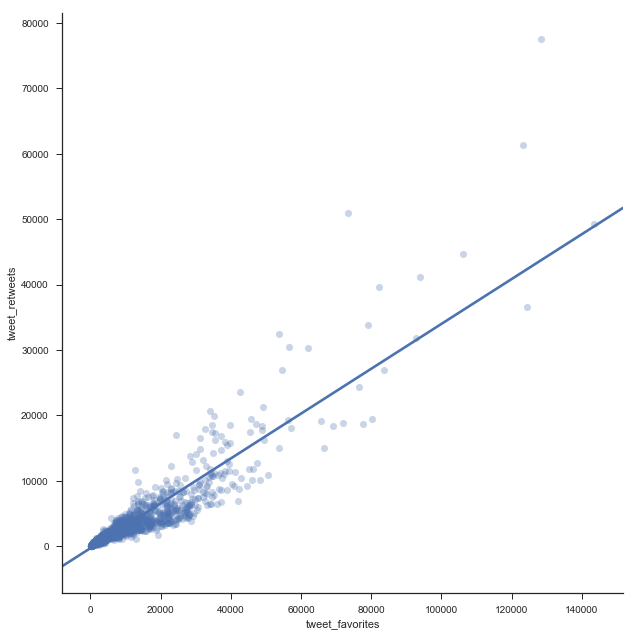

In [1140]:
import seaborn as sns
sns.set(style="ticks")

sns.lmplot(x="tweet_favorites", y="tweet_retweets", data=we_rate_dogs_clean,
           ci=None, palette="muted", size=9,
           scatter_kws={"s": 50, "alpha": 0.3})

We can see a strong correlation between those two variables. From plot we can conclude if the tweet has more likes, retweets are increases also.

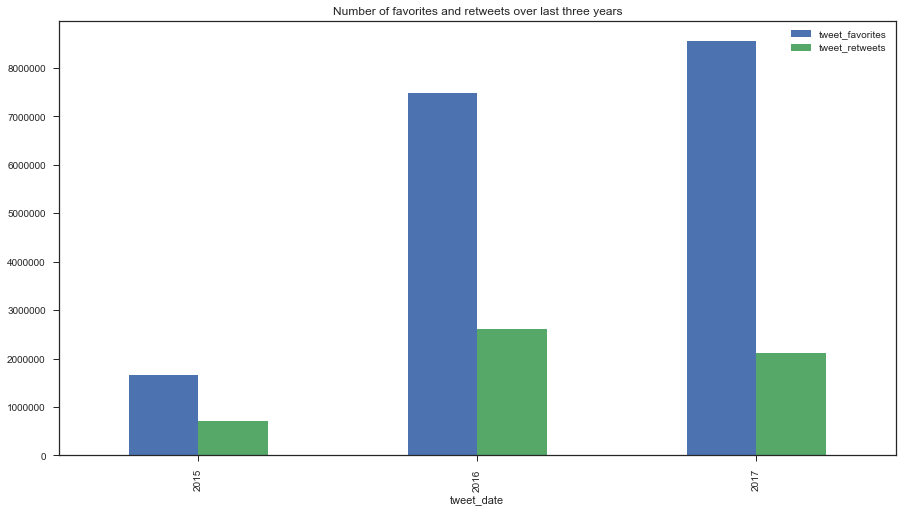

In [1135]:
year = we_rate_dogs_clean["tweet_date"].dt.year
tweet_fav_ret = we_rate_dogs_clean[['tweet_favorites','tweet_retweets']]
im = tweet_fav_ret.groupby(year).sum().plot(kind="bar",title='Number of favorites and retweets over last three years')

A total number of tweet favorites (likes) has increased over last three years. Total retweet has decreased in 2017. in compare with 2016.

Text(0.5,0,'Months')

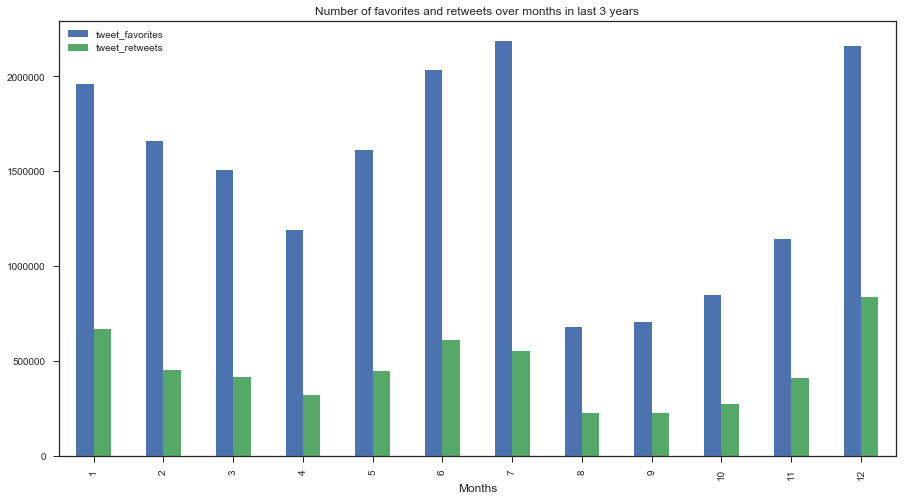

In [1144]:
month = we_rate_dogs_clean["tweet_date"].dt.month
tweet_fav_ret = we_rate_dogs_clean[['tweet_favorites','tweet_retweets']]
ax = tweet_fav_ret.groupby(month).sum().plot(kind="bar",title='Number of favorites and retweets over months in last 3 years')
ax.set_xlabel('Months', fontsize=12)

Over the past 3 years, we can see that the 1st, 6th, 7th and 12th month has in total the most likes for tweets and retweets.

Text(0.5,0,'Days')

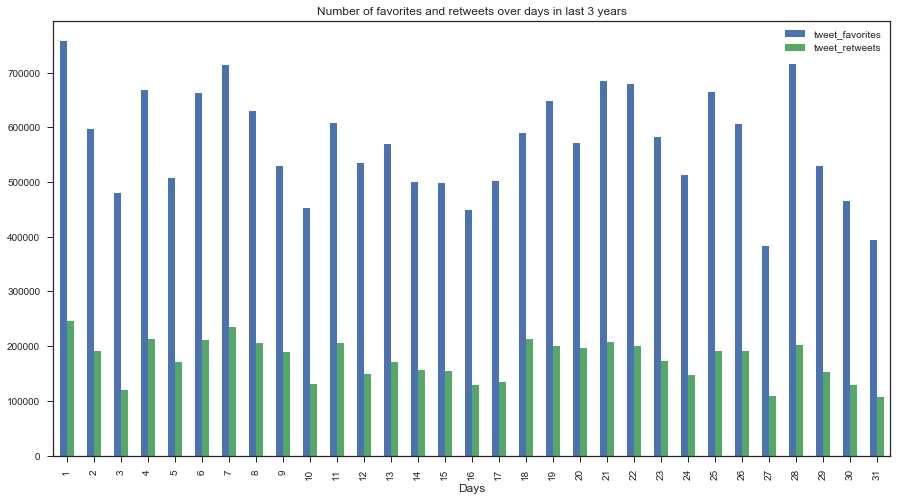

In [1142]:
day = we_rate_dogs_clean["tweet_date"].dt.day
tweet_fav_ret = we_rate_dogs_clean[['tweet_favorites','tweet_retweets']]
ax = tweet_fav_ret.groupby(day).sum().plot(kind="bar",title='Number of favorites and retweets over days in last 3 years')
ax.set_xlabel('Days', fontsize=12)

Over the past 3 years, that most popular days of the month for likes and retweets are: 1st, 7th, 28th. In the middle and at the ending we see some decreasing trends.

Text(0.5,0,'Value Count')

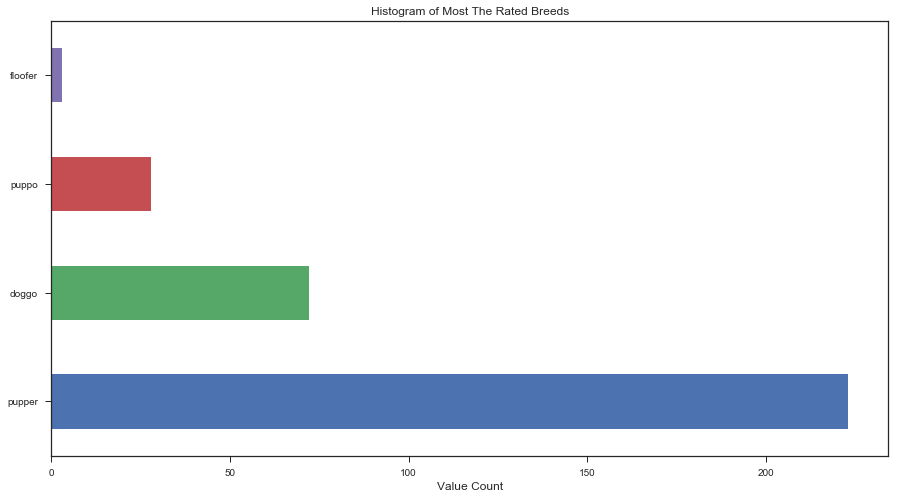

In [1131]:
fig, ax = plt.subplots()
ax = df_dog_category['dog_category'].value_counts().plot(kind = 'barh', title='Histogram of Most The Rated Breeds',)
ax.set_xlabel('Value Count', fontsize=12)

Most popular dog category has been pupper and least popular has been floofer.